# Visualization analysis


In [301]:
#pip install seaborn

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Lectura de los datos

In [303]:
df_finales = pd.read_csv('../files/datos_para_almacenar/datos_limpios.csv', sep=";")

In [304]:
df_finales.drop(columns="Unnamed: 0", inplace=True)

In [305]:
df_finales

,Vivienda,Precio (€),Numero habitaciones,Metros cuadrados (m²),Municipio,Zona,Barrio,Garaje,Regimen,Planta,...,%propiedad,%alquiler,Proporcion Propiedad/Alquiler,total_superficie,menos_de_60m2,entre_61_y_105m2,mas_de_106m2,%menos_de_60m2,%entre_61_y_105m2,%mas_de_106m2
0,"Piso en San Isidro, Madrid",245000,2,65.0,Madrid,Carabanchel,San Isidro,No,Compra,1ª,...,NaN,NaN,2.920309,1533221,724030,660976,141824,47.222807,43.110289,9.250069
1,"Piso en calle de Pablo Montesinos, San Isidro,...",240000,3,79.0,Madrid,Carabanchel,San Isidro,No,Compra,Bajo,...,NaN,NaN,2.920309,1533221,724030,660976,141824,47.222807,43.110289,9.250069
2,"Piso en calle Soldado José María Rey, San Isid...",199000,1,88.0,Madrid,Carabanchel,San Isidro,No,Compra,2ª,...,NaN,NaN,2.920309,1533221,724030,660976,141824,47.222807,43.110289,9.250069
3,"Piso en calle Alcaudón, San Isidro, Madrid",237000,3,67.0,Madrid,Carabanchel,San Isidro,No,Compra,1ª,...,NaN,NaN,2.920309,1533221,724030,660976,141824,47.222807,43.110289,9.250069
4,"Piso en San Isidro, Madrid",250000,2,73.0,Madrid,Carabanchel,San Isidro,No,Compra,1ª,...,NaN,NaN,2.920309,1533221,724030,660976,141824,47.222807,43.110289,9.250069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6168,"Piso en avenida Pablo Picasso, 1, Zaidín, Granada",800,3,80.0,Granada,Zaidin,Zaidin,No,Alquiler,Bajo,...,71.566174,18.477155,3.873225,141257,23167,88612,29082,16.400603,62.731050,20.588006
6169,"Piso en avenida Barcelona, 18, Zaidín, Granada",700,3,140.0,Granada,Zaidin,Zaidin,No,Alquiler,9ª,...,71.566174,18.477155,3.873225,141257,23167,88612,29082,16.400603,62.731050,20.588006
6170,"Piso en Zaidín, Granada",850,3,96.0,Granada,Zaidin,Zaidin,Garaje incluido,Alquiler,Bajo,...,71.566174,18.477155,3.873225,141257,23167,88612,29082,16.400603,62.731050,20.588006
6171,"Piso en calle Covadonga, 6, Zaidín, Granada",800,3,70.0,Granada,Zaidin,Zaidin,No,Alquiler,2ª,...,71.566174,18.477155,3.873225,141257,23167,88612,29082,16.400603,62.731050,20.588006


In [306]:
len(set(df_finales['Municipio'].to_list()))

20

In [307]:
df_finales.columns

Index(['Vivienda', 'Precio (€)', 'Numero habitaciones',
       'Metros cuadrados (m²)', 'Municipio', 'Zona', 'Barrio', 'Garaje',
       'Regimen', 'Planta', 'Interior/Exterior', 'Ascensor', '1 persona',
       '2 personas', '3 personas', '4 personas', '5 o más personas',
       'Población', 'm2_municipio', 'Total Antes de 1900',
       'Total De 1900 a 1920', 'Total De 1921 a 1940', 'Total De 1941 a 1950',
       'Total De 2011 a 2020', 'Total No consta', 'Total De 1951 a 1970',
       'Total De 1971 a 1990', 'Total De 1991 a 2010', 'reg_autonomos',
       'reg_general', 'Total afiliados', 'Turismo 2024', 'index',
       'En alquiler', 'En propiedad', 'Otro régimen de tenencia',
       'Total viviendas', '%propiedad', '%alquiler',
       'Proporcion Propiedad/Alquiler', 'total_superficie', 'menos_de_60m2',
       'entre_61_y_105m2', 'mas_de_106m2', '%menos_de_60m2',
       '%entre_61_y_105m2', '%mas_de_106m2'],
      dtype='object')

## 2. Análisis

**IMPORTANTE** DIFERENCIAR ENTRE EL PRECIO DE LA COMPRA/ ALQUILER

### 2.1 Comparación por municipios de las ofertas de alquiler y compra con las regimen en si

### 2.2 Comparación del precio de las viviendas vs el numero de pisos turisticos vs la oferta que hay

### 2.3 Precio de la viviendas vs afiliados de la ss

### 2.4 Características de la demanda vs lo predominante en cada ciudad

In [308]:
colores_personalizados = [
    '#ff9999',  # Rojo claro
    '#66b3ff',  # Azul claro
    '#99ff99',  # Verde claro
    '#ffcc99',  # Naranja claro
    '#c2c2f0',  # Lavanda
    '#ffb3e6',  # Rosa claro
    '#ffccff',  # Lavanda claro
    '#c2f0c2',  # Verde suave
    '#ffff99',  # Amarillo claro
    '#ffb3b3',  # Rojo suave
]

##### Numero de personas por vivienda

In [309]:
df_tamaño_hogar = pd.read_csv("Tamaño_del_hogar.csv", sep=";")

In [310]:
df_tamaño_hogar.drop(columns="Unnamed: 0")

,Municipio,1 persona,2 personas,3 personas,4 personas,5 o más personas
0,Alacant/Alicante,39.536,37.976,27.155,21.375,9.822
1,Barcelona,207.973,205.174,126.877,89.495,41.658
2,Bilbao,47.407,47.145,28.826,19.589,6.494
3,A Coruña,32.234,32.136,21.498,13.961,4.808
4,Córdoba,31.242,33.205,25.885,23.487,8.849
5,Elche/Elx,20.773,24.444,19.225,16.947,7.109
6,Gijón,38.928,39.375,24.710,13.156,4.180
7,Granada,33.549,27.223,17.464,13.384,6.696
8,L´Hospitalet de Llobregat,24.350,31.953,21.324,15.227,8.955
9,Madrid,397.447,380.686,251.859,190.474,102.389


In [311]:
df_tamaño_hogar_perc = df_tamaño_hogar.set_index('Municipio')

In [312]:
df_tamaño_hogar_perc.drop(columns="Unnamed: 0", inplace= True)

In [313]:
df_tamaño_hogar_perc

,1 persona,2 personas,3 personas,4 personas,5 o más personas
Municipio,,,,,
Alacant/Alicante,39.536,37.976,27.155,21.375,9.822
Barcelona,207.973,205.174,126.877,89.495,41.658
Bilbao,47.407,47.145,28.826,19.589,6.494
A Coruña,32.234,32.136,21.498,13.961,4.808
Córdoba,31.242,33.205,25.885,23.487,8.849
Elche/Elx,20.773,24.444,19.225,16.947,7.109
Gijón,38.928,39.375,24.710,13.156,4.180
Granada,33.549,27.223,17.464,13.384,6.696
L´Hospitalet de Llobregat,24.350,31.953,21.324,15.227,8.955


In [314]:
df_tamaño_hogar_perc = df_tamaño_hogar_perc.div(df_tamaño_hogar_perc.sum(axis=1), axis=0) * 100

In [315]:
df_tamaño_hogar_perc

,1 persona,2 personas,3 personas,4 personas,5 o más personas
Municipio,,,,,
Alacant/Alicante,29.099688,27.951481,19.986899,15.732644,7.229288
Barcelona,30.986312,30.569284,18.903657,13.334039,6.206709
Bilbao,31.718642,31.543346,19.286637,13.106429,4.344946
A Coruña,30.805547,30.711890,20.545314,13.342317,4.594933
Córdoba,25.468745,27.068999,21.101673,19.146803,7.213780
Elche/Elx,23.472847,27.620963,21.723655,19.149585,8.032950
Gijón,32.345927,32.717347,20.531953,10.931541,3.473232
Granada,34.123642,27.689288,17.763131,13.613247,6.810692
L´Hospitalet de Llobregat,23.917335,31.385241,20.945103,14.956438,8.795882


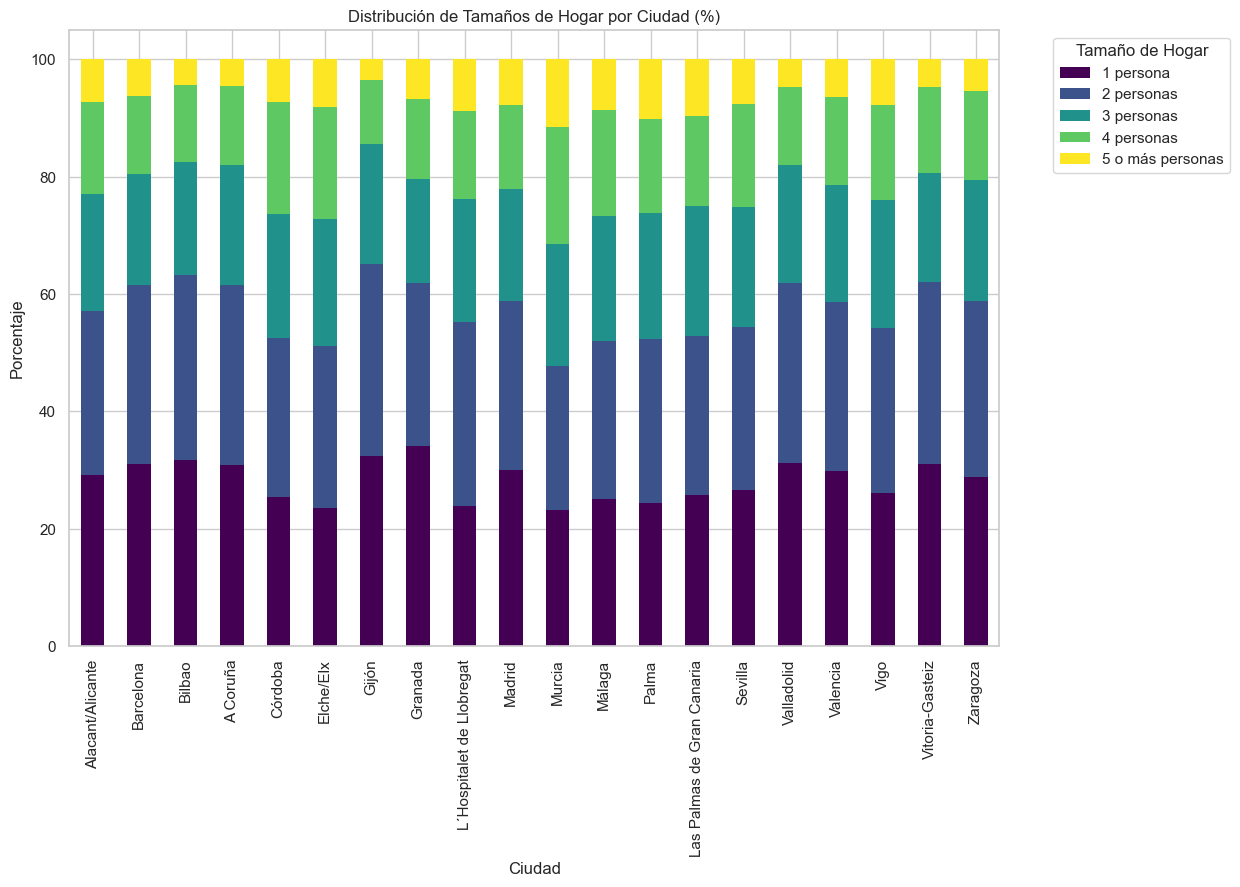

In [316]:
ax = df_tamaño_hogar_perc.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis', edgecolor='none')

# Etiquetas y título
plt.title('Distribución de Tamaños de Hogar por Ciudad (%)')
plt.xlabel('Ciudad')
plt.ylabel('Porcentaje')
plt.legend(title='Tamaño de Hogar', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

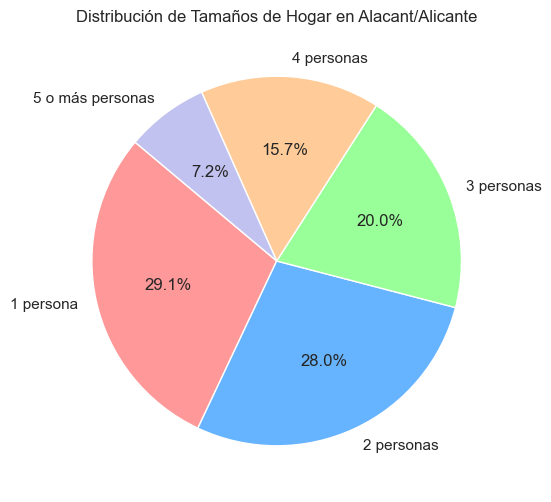

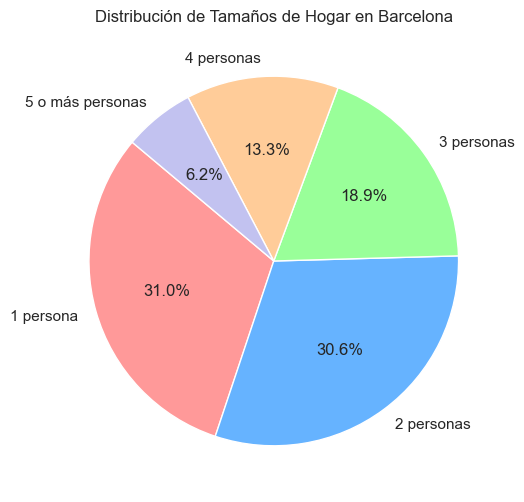

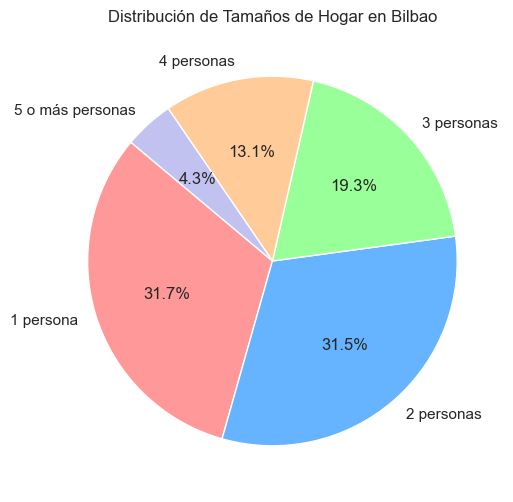

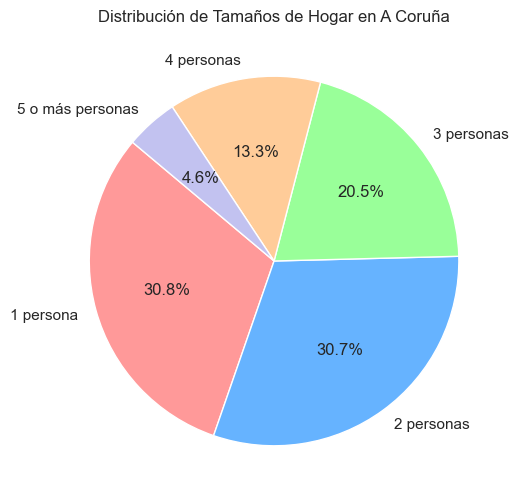

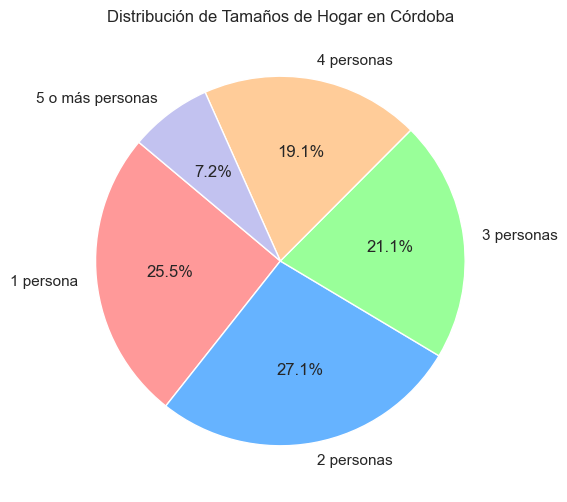

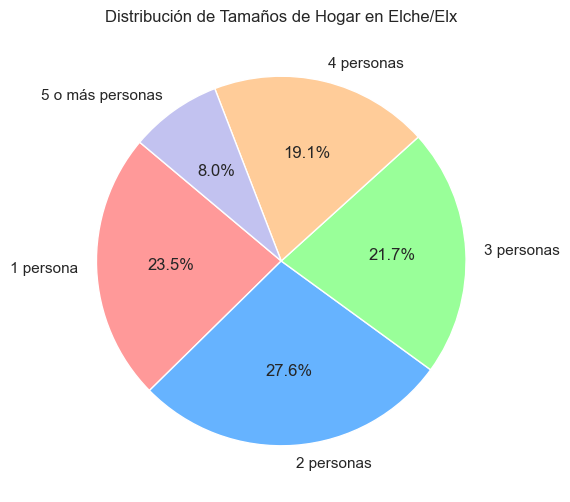

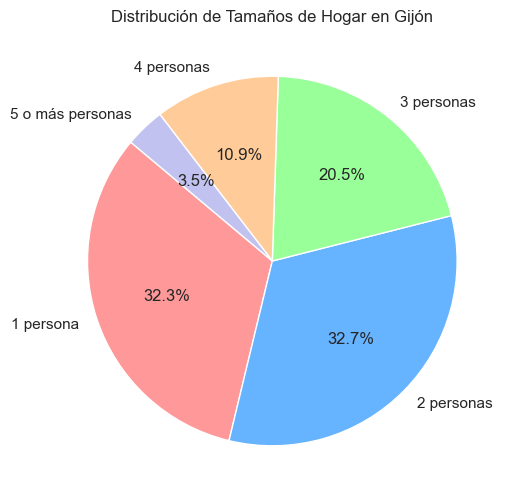

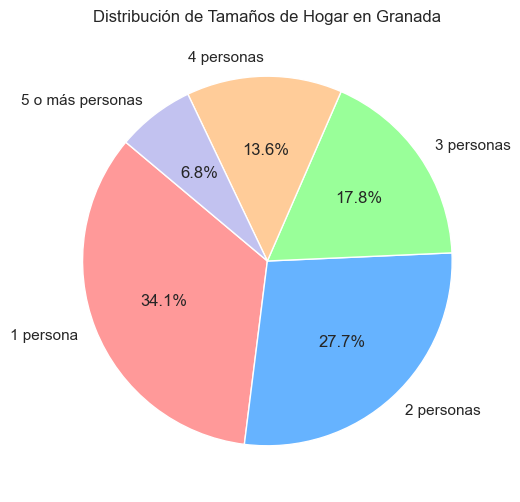

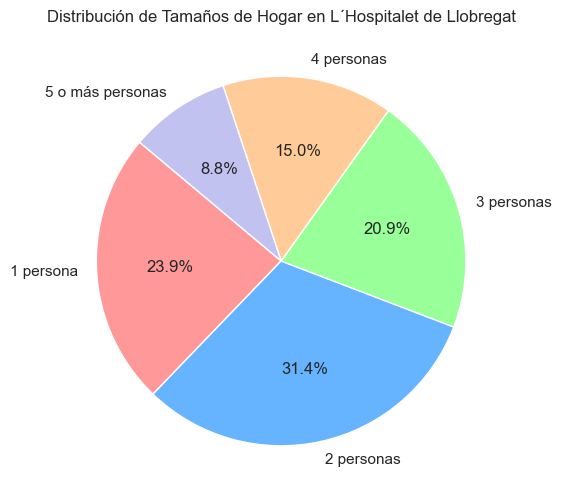

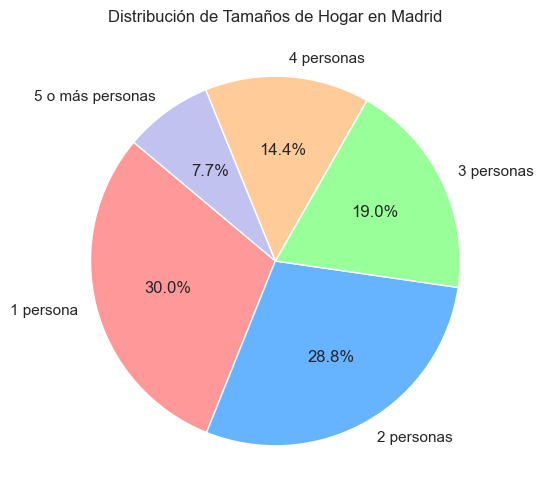

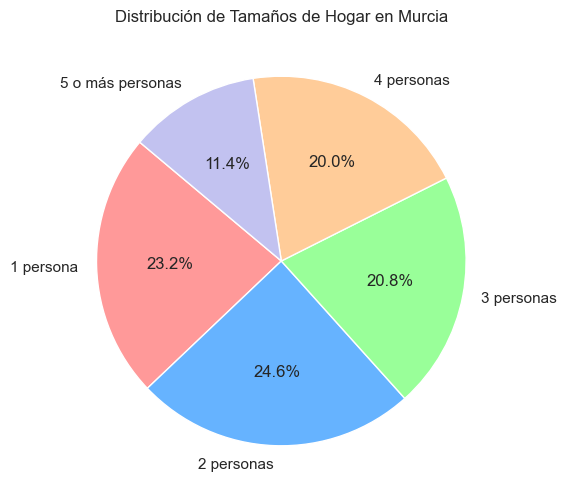

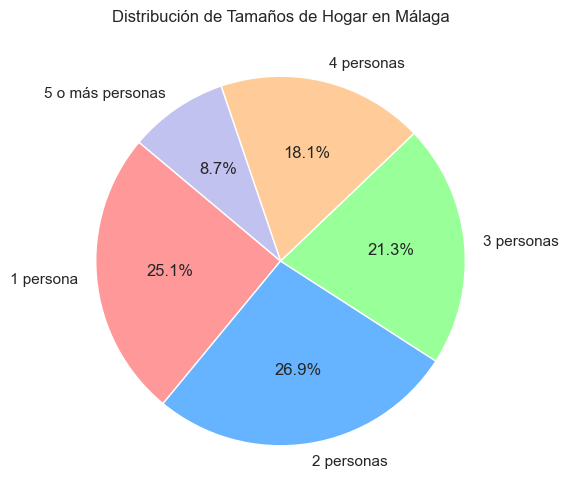

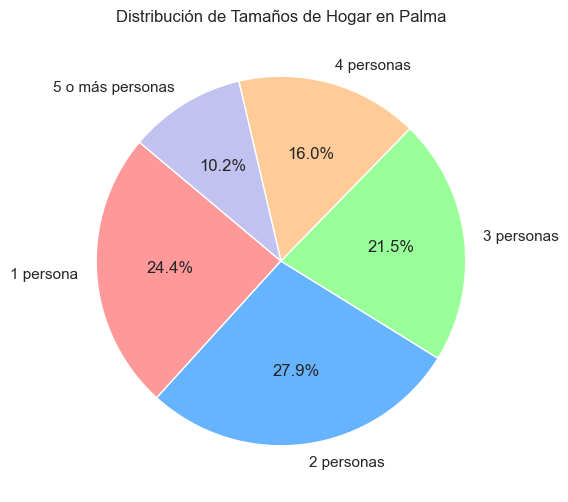

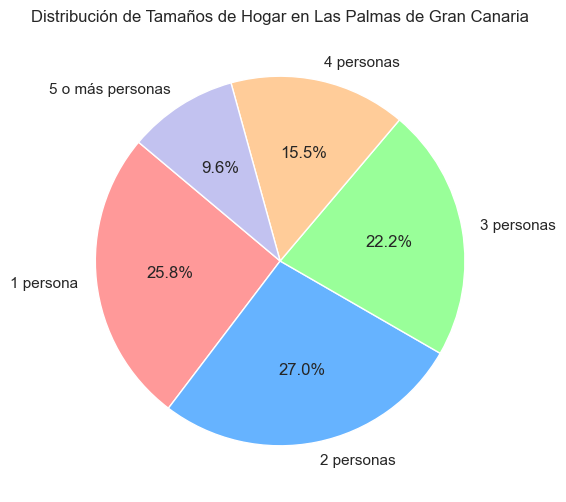

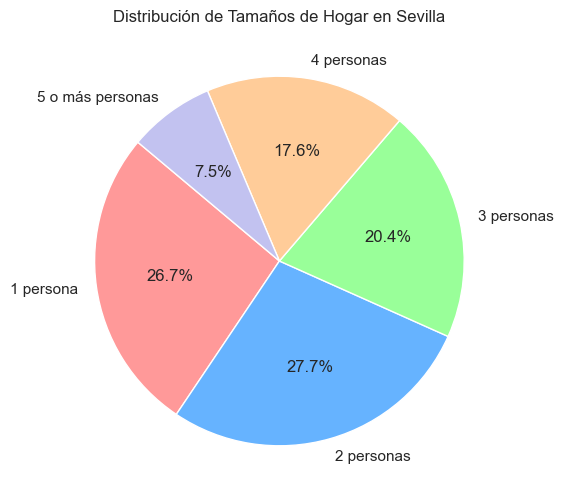

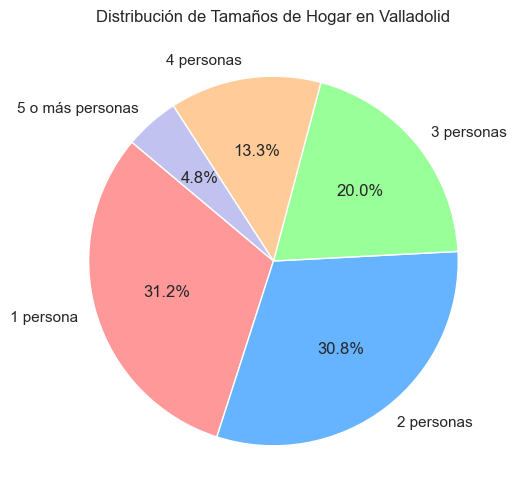

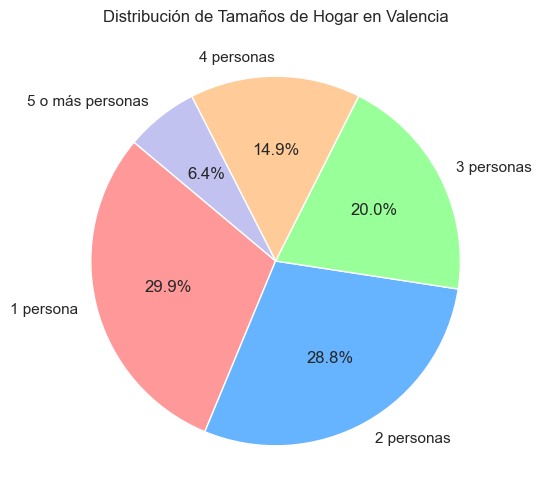

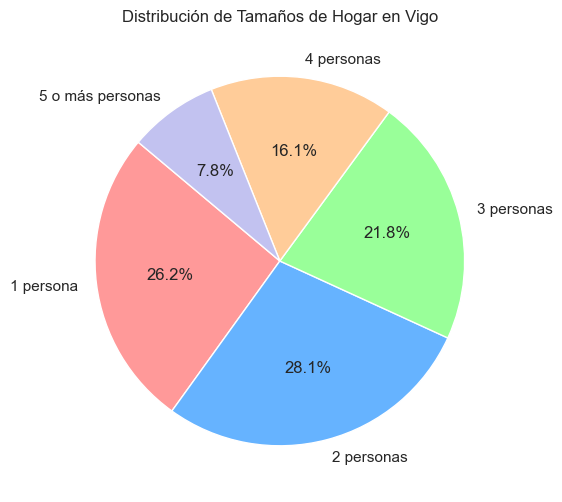

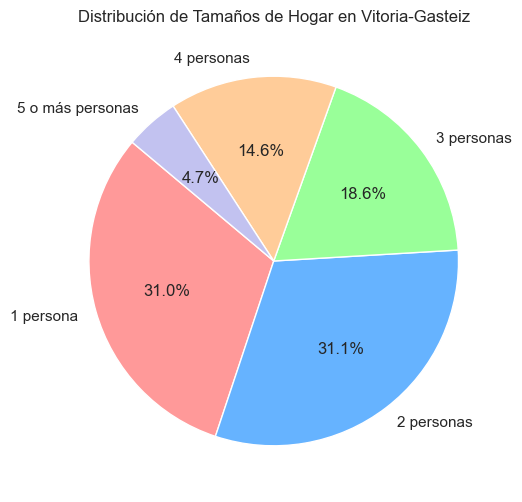

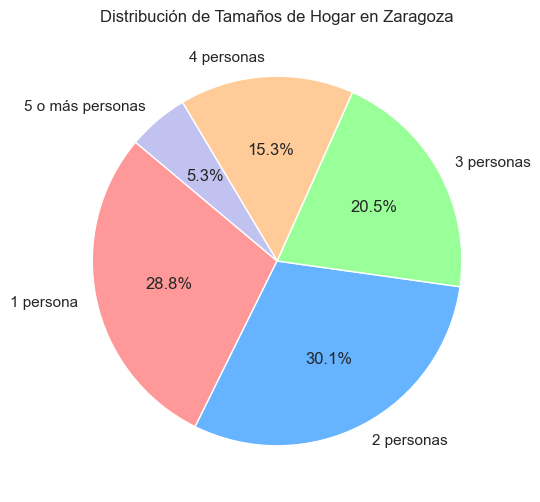

In [317]:
for ciudad, datos in df_tamaño_hogar_perc.iterrows():

    # Crear el gráfico de pastel para cada ciudad
    plt.figure(figsize=(6, 6))
    plt.pie(datos, labels=datos.index, autopct='%1.1f%%', startangle=140, colors=colores_personalizados)
    
    # Título de la gráfica con el nombre de la ciudad
    plt.title(f'Distribución de Tamaños de Hogar en {ciudad}')
    
    # Mostrar el gráfico
    plt.show()

#### Tamaño de las viviendas

In [318]:
df_tamaño = pd.read_csv("../files/datos_para_almacenar/Tamaño.csv", sep=";")

In [319]:
df_tamaño.columns

Index(['Unnamed: 0', 'Municipio', 'total_superficie', 'menos_de_60m2',
       'entre_61_y_105m2', 'mas_de_106m2', '%menos_de_60m2',
       '%entre_61_y_105m2', '%mas_de_106m2'],
      dtype='object')

In [320]:
df_tamaño.drop(columns=["Unnamed: 0", 'total_superficie' , "menos_de_60m2", "entre_61_y_105m2", "mas_de_106m2"], inplace= True)

In [321]:
df_tamaño = df_tamaño.set_index('Municipio')

In [322]:
df_tamaño = df_tamaño.rename(columns={'%menos_de_60m2': 'Menos de 60m2', 
                              '%entre_61_y_105m2': 'Entre 61 y 105 m2', 
                              '%mas_de_106m2': 'Mas de 106 m2'})

In [323]:
df_tamaño

,Menos de 60m2,Entre 61 y 105 m2,Mas de 106 m2
Municipio,,,
Vitoria-Gasteiz,11.264633,76.895030,11.840338
Alacant/Alicante,20.040712,63.724968,15.288983
Elche/Elx,15.280841,63.540662,21.050138
Palma,24.253279,56.495533,18.683305
Barcelona,48.870048,41.164833,7.998506
L´Hospitalet de Llobregat,71.897401,26.444501,1.195605
Córdoba,26.623552,55.886744,17.261905
A Coruña,29.617855,60.712162,9.534892
Granada,16.400603,62.731050,20.588006


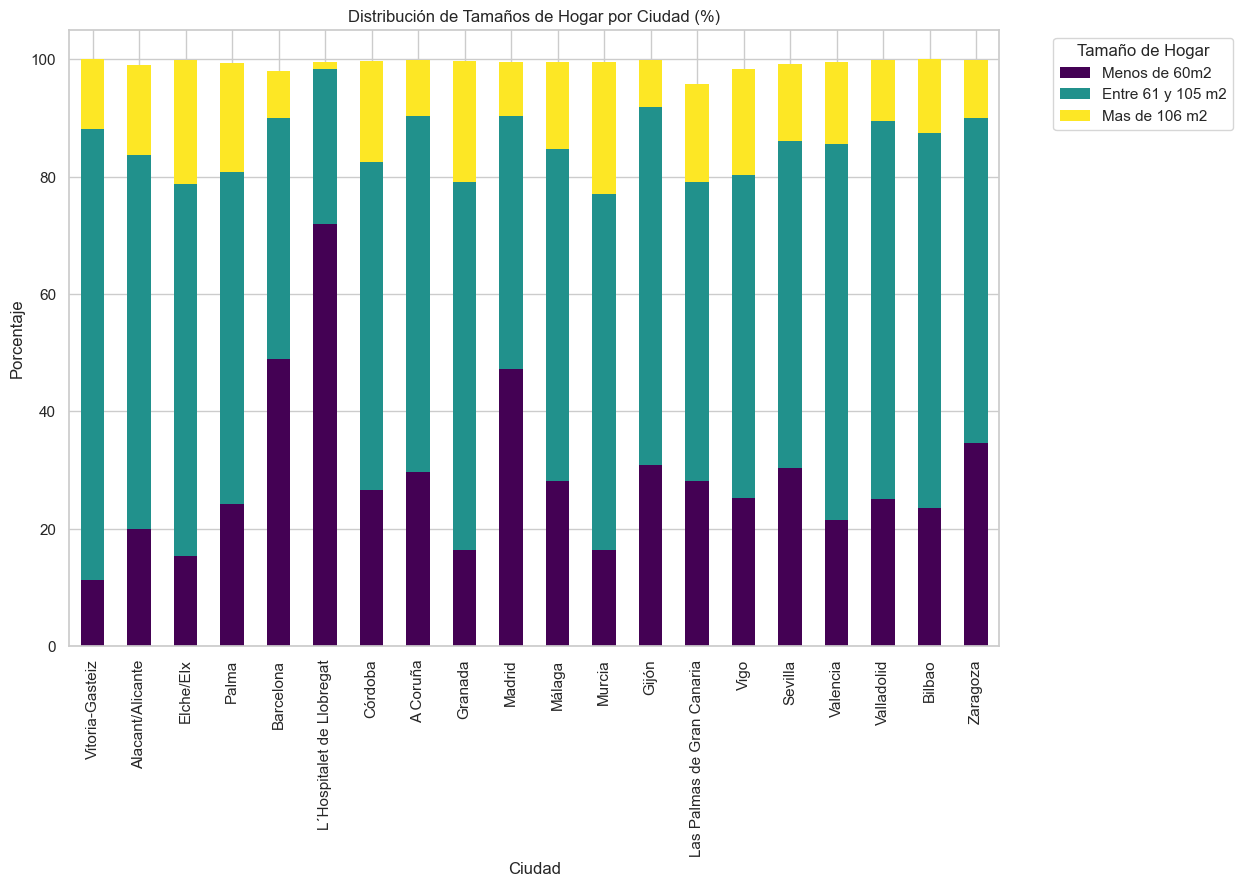

In [324]:
ax = df_tamaño.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis', edgecolor='none')

# Etiquetas y título
plt.title('Distribución de Tamaños de Hogar por Ciudad (%)')
plt.xlabel('Ciudad')
plt.ylabel('Porcentaje')
plt.legend(title='Tamaño de Hogar', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

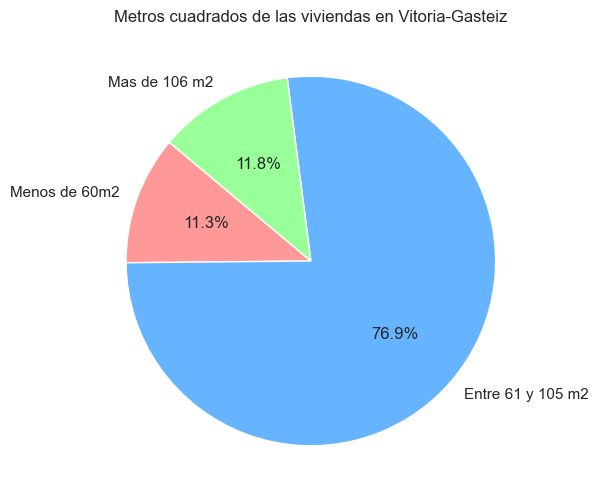

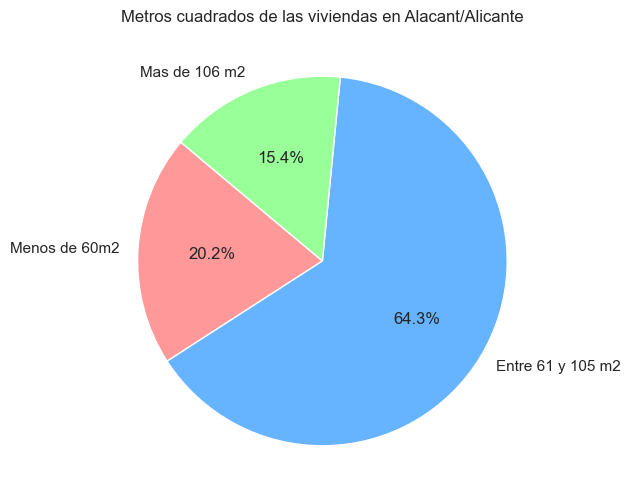

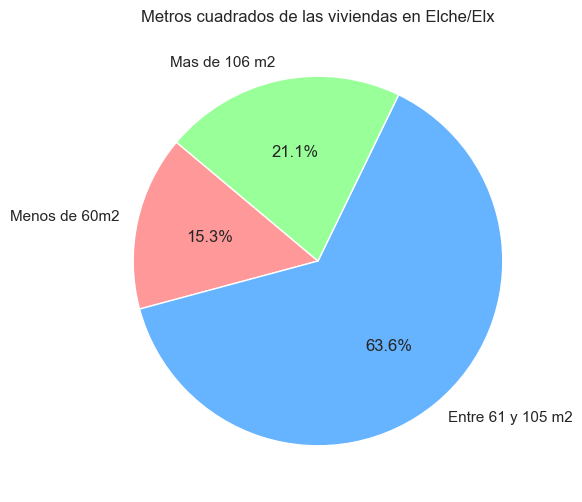

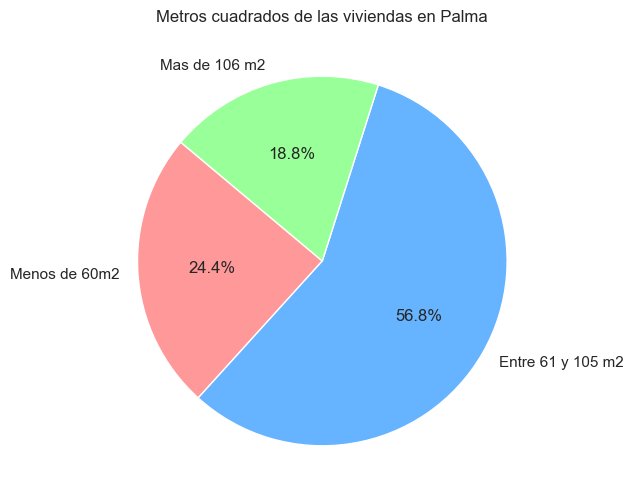

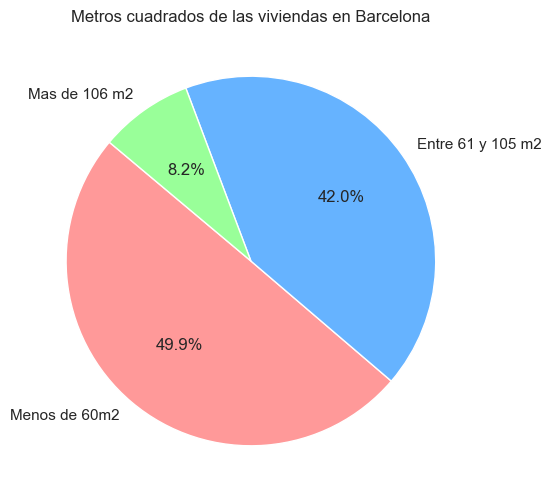

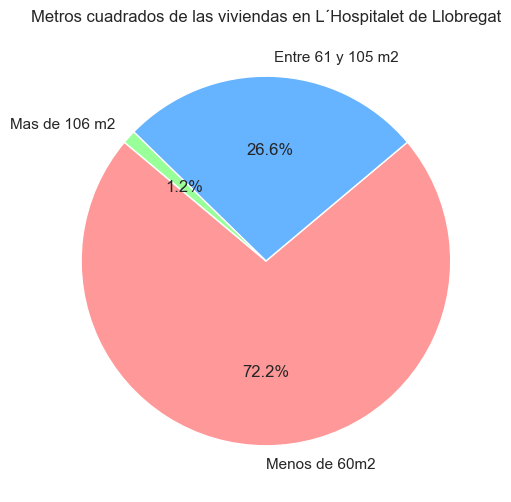

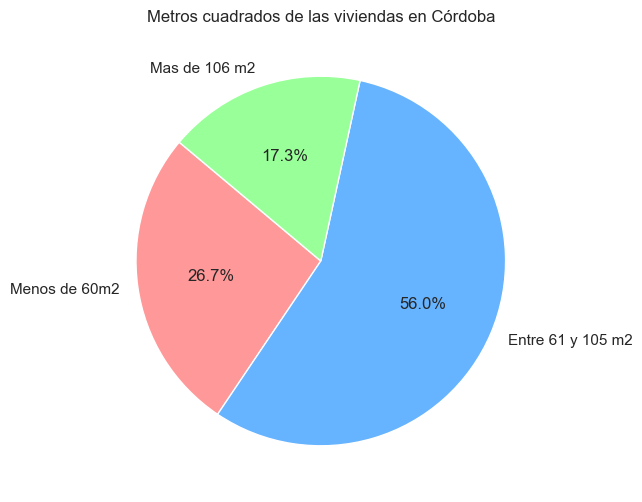

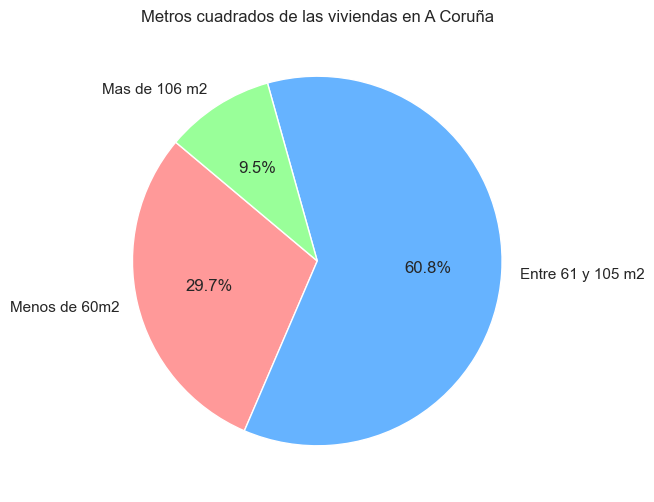

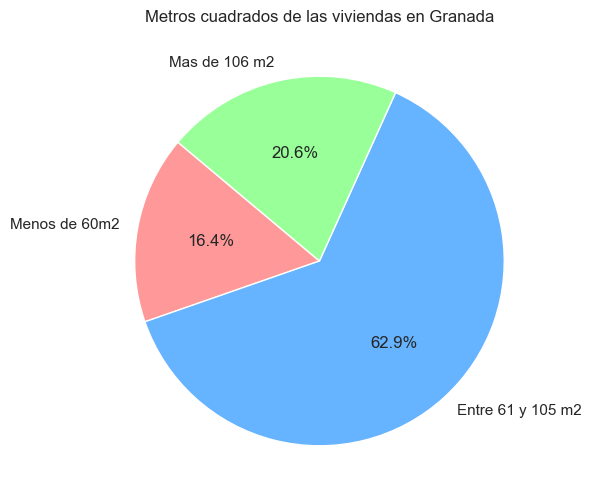

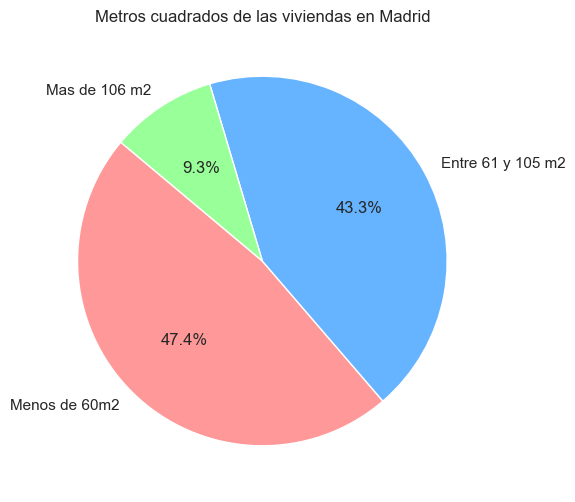

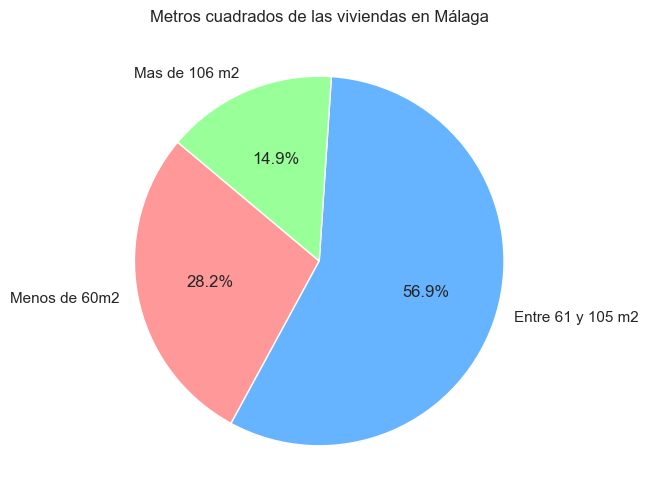

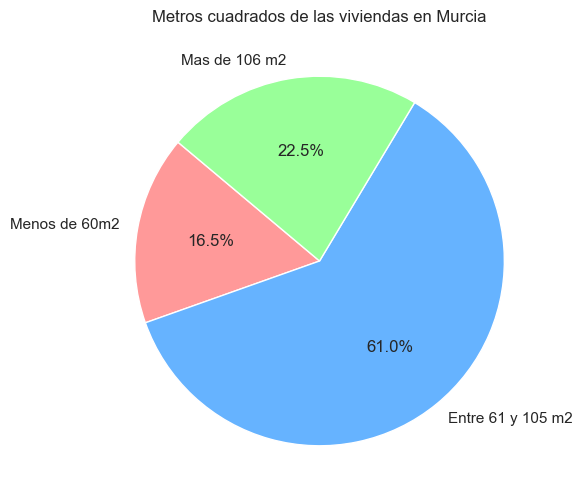

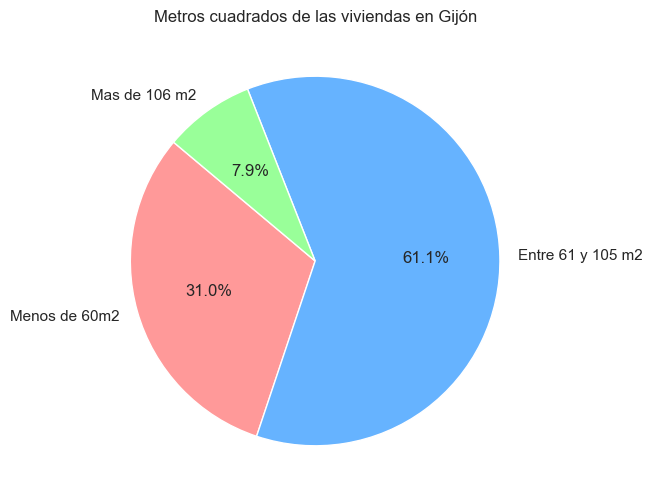

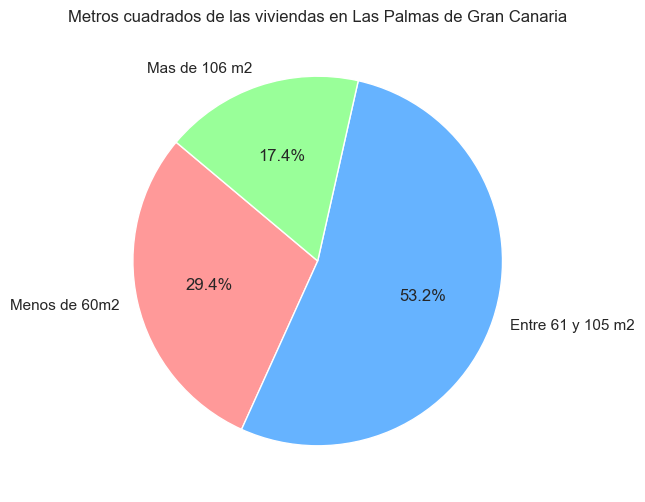

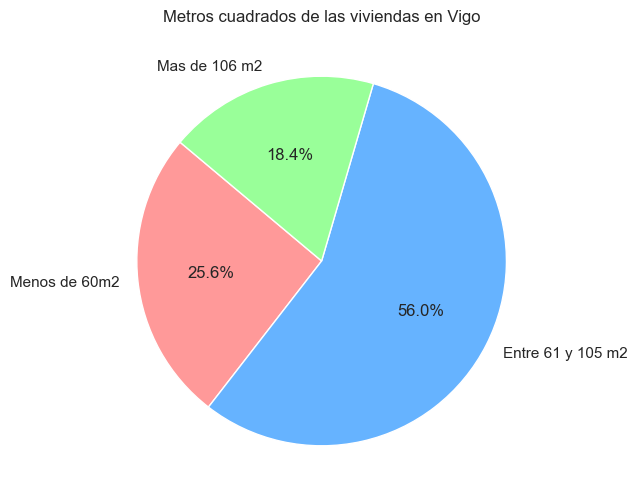

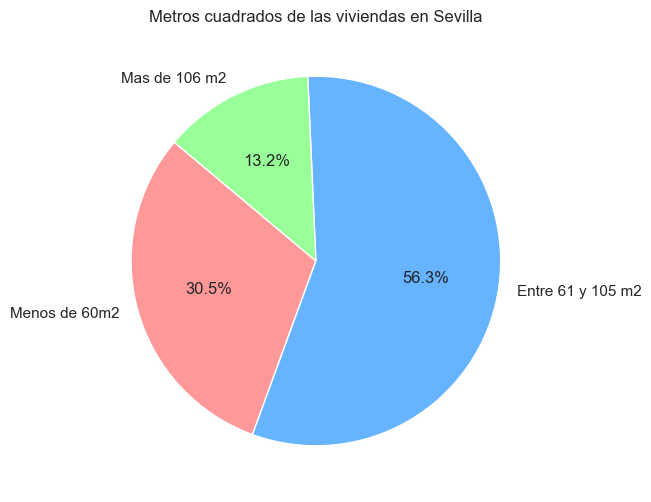

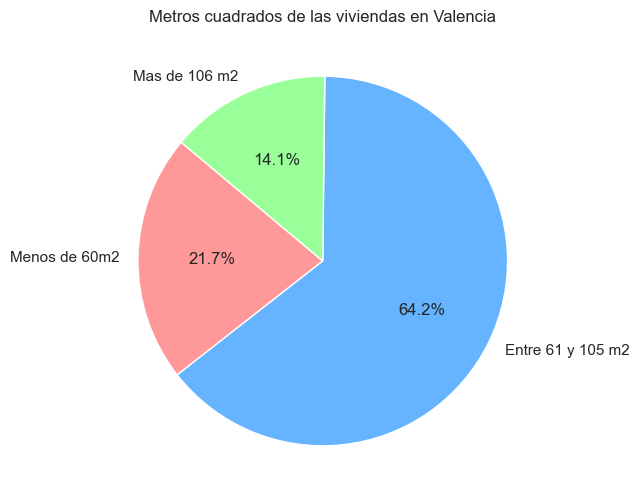

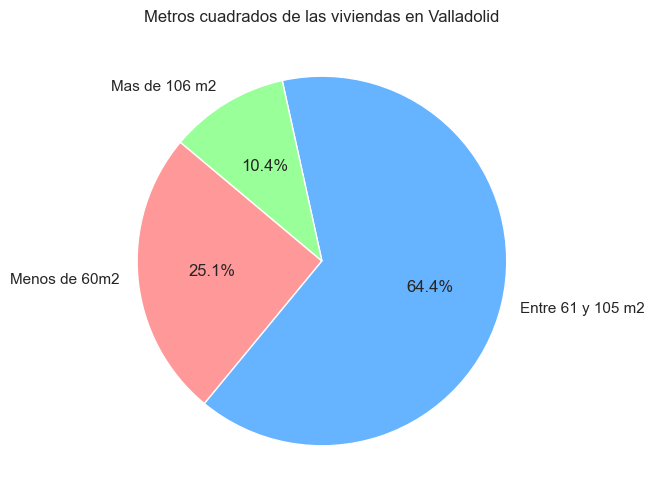

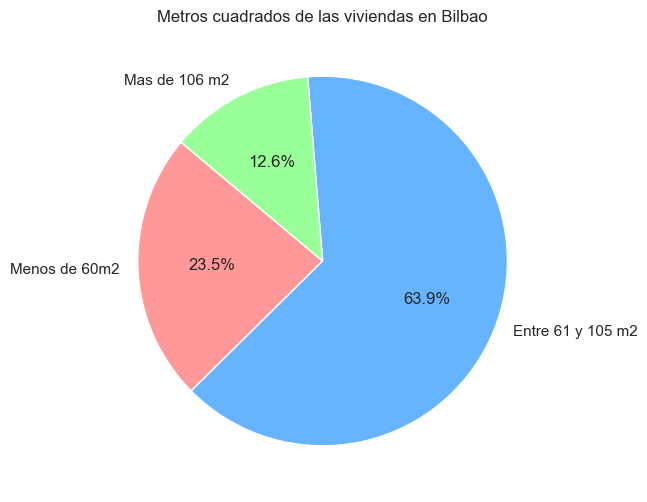

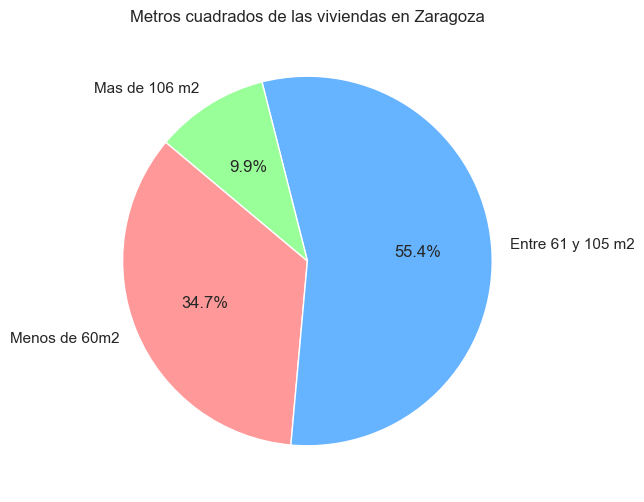

In [325]:
for ciudad, datos in df_tamaño.iterrows():

    # Crear el gráfico de pastel para cada ciudad
    plt.figure(figsize=(6, 6))
    plt.pie(datos, labels=datos.index, autopct='%1.1f%%', startangle=140, colors=colores_personalizados)
    
    # Título de la gráfica con el nombre de la ciudad
    plt.title(f'Metros cuadrados de las viviendas en {ciudad}')
    
    # Mostrar el gráfico
    plt.show()

#### Viviendas de alquiler/compra en cada ciudad

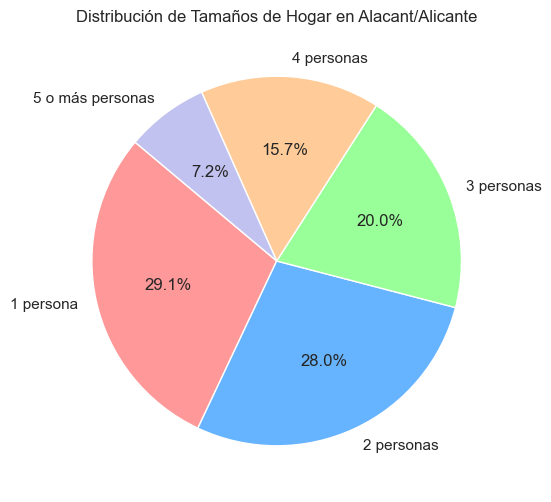

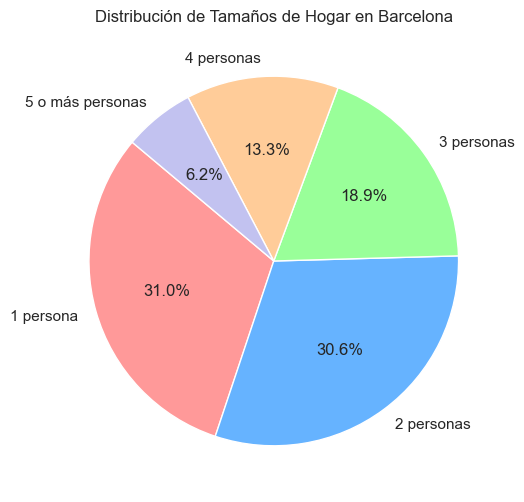

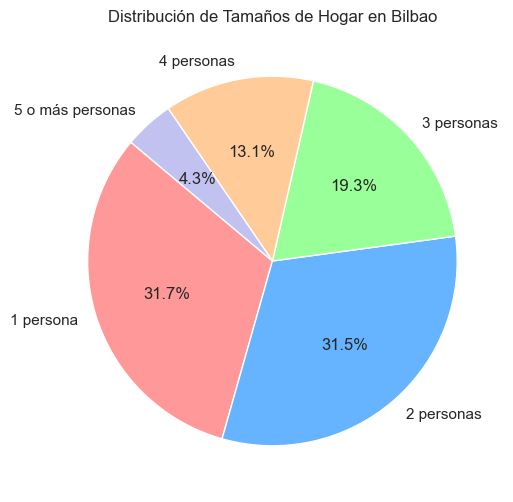

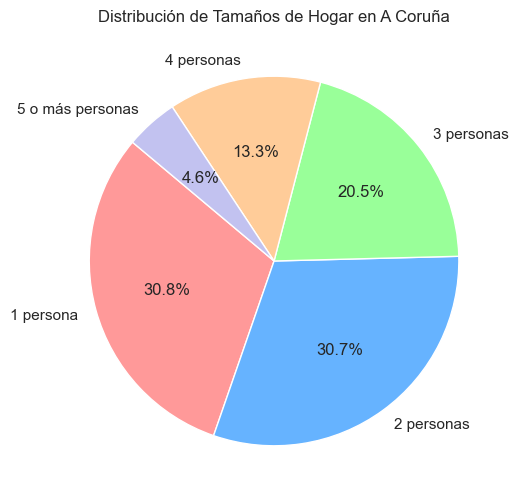

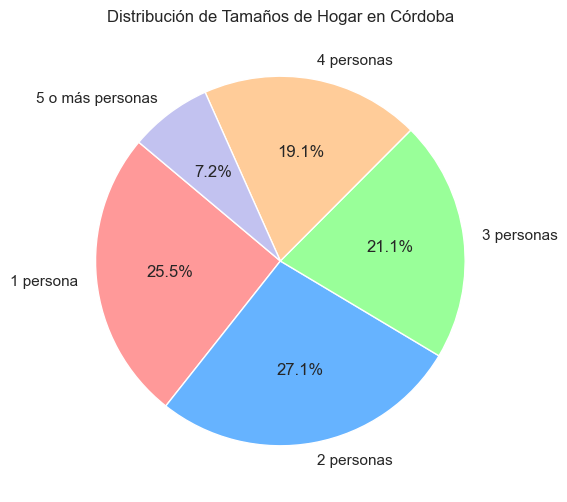

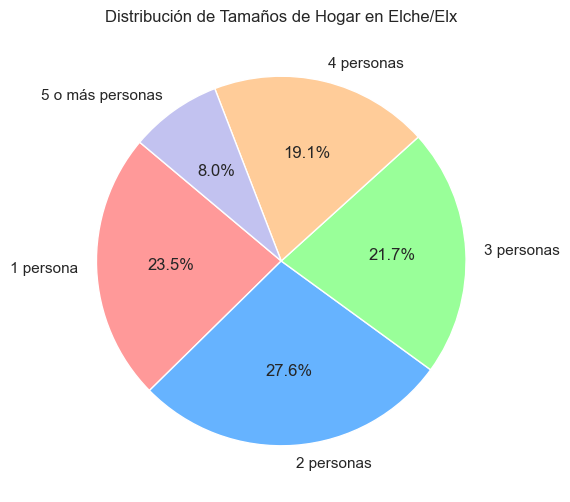

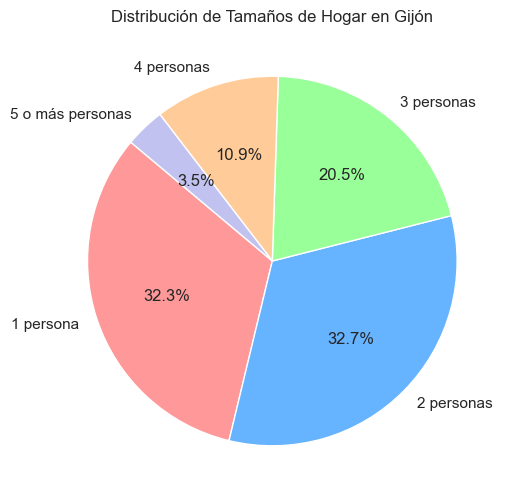

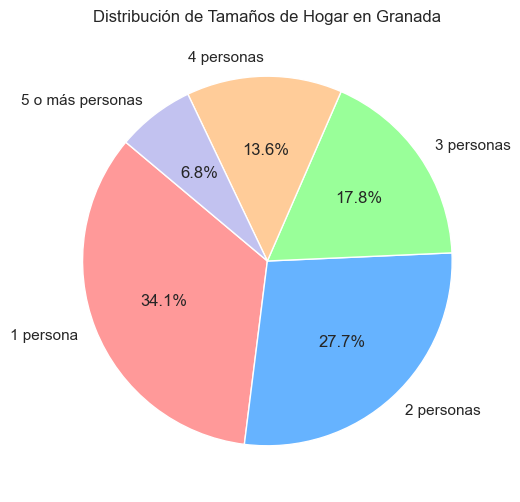

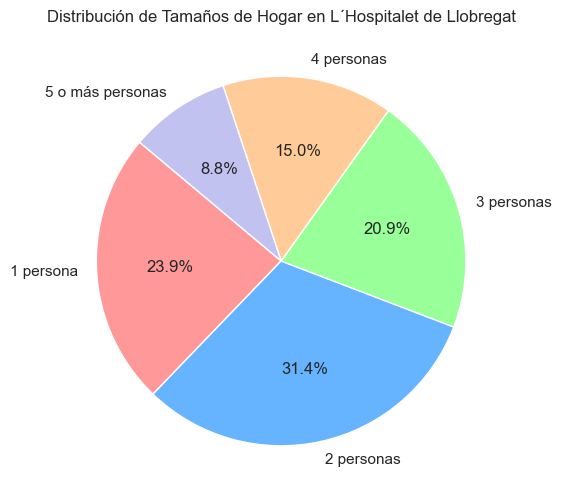

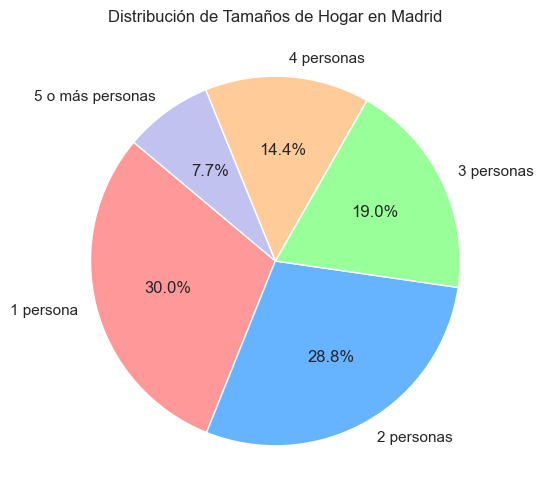

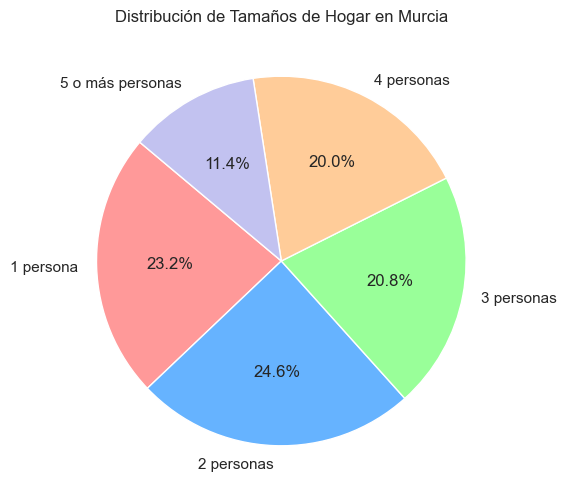

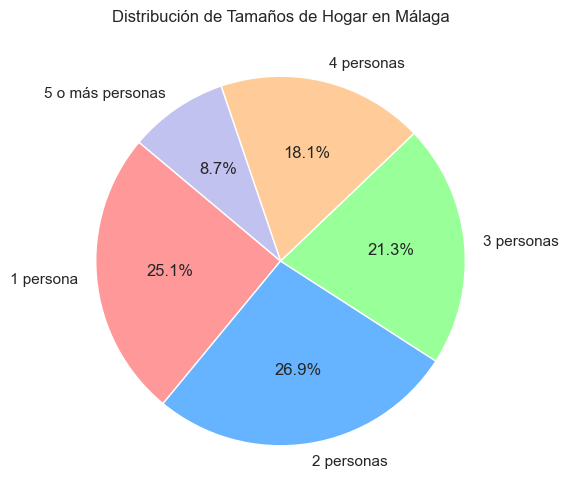

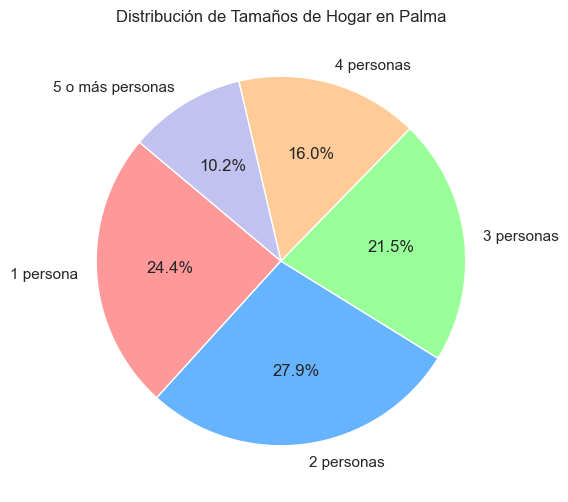

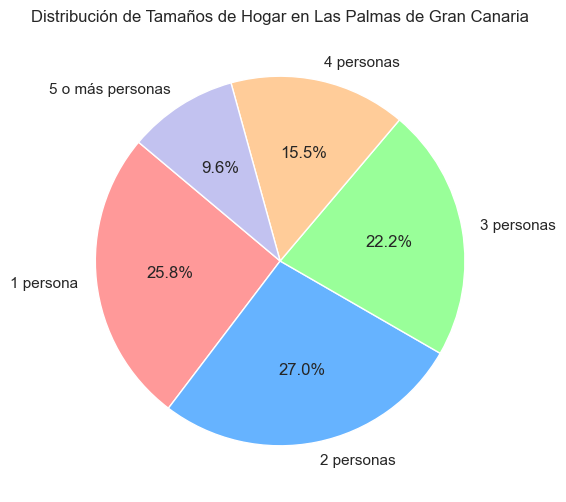

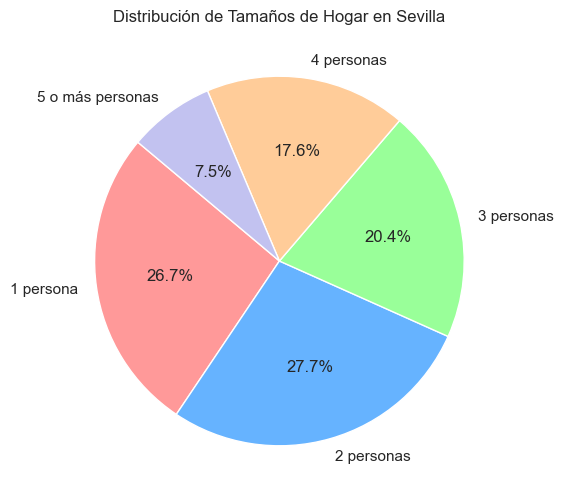

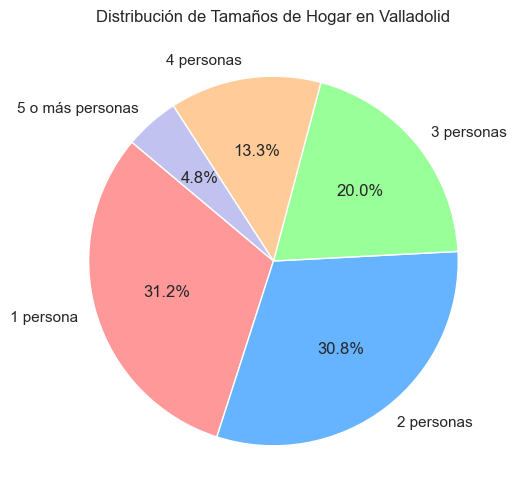

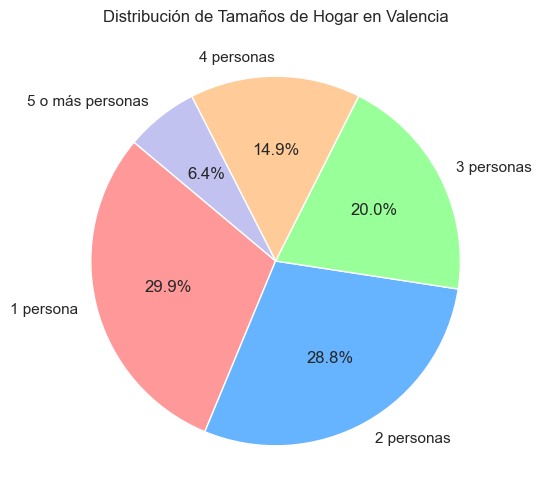

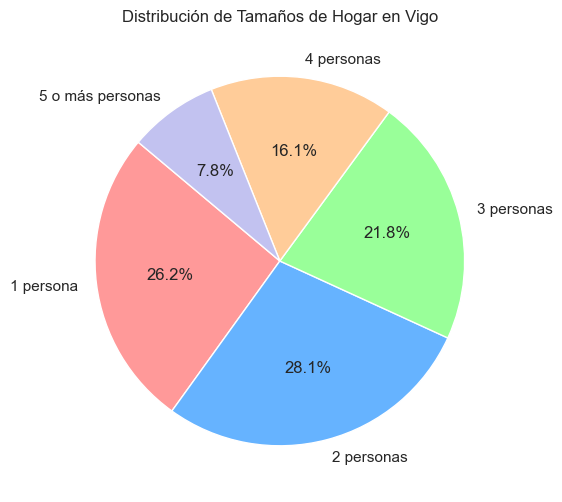

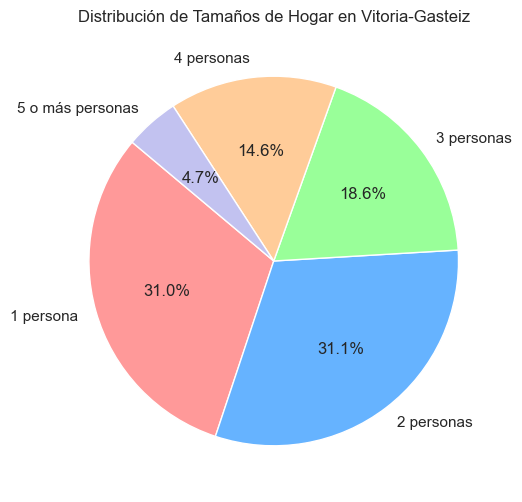

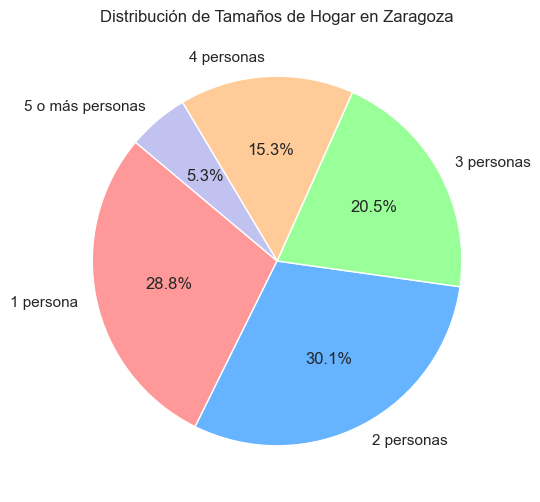

In [326]:
for ciudad, datos in df_tamaño_hogar_perc.iterrows():

    # Crear el gráfico de pastel para cada ciudad
    plt.figure(figsize=(6, 6))
    plt.pie(datos, labels=datos.index, autopct='%1.1f%%', startangle=140, colors=colores_personalizados)
    
    # Título de la gráfica con el nombre de la ciudad
    plt.title(f'Distribución de Tamaños de Hogar en {ciudad}')
    
    # Mostrar el gráfico
    plt.show()

#### Por ciudad de idealista

##### Sin diferenciar regimen

In [327]:
municipios_top_20 = ["Madrid", "Barcelona", "Valencia", "Sevilla", "Zaragoza", "Málaga", "Murcia", "Palma", "Las Palmas de Gran Canaria", "Alacant/Alicante","Bilbao", "Córdoba", "Valladolid", "Vigo","L´Hospitalet de Llobregat","Gijón", "Vitoria-Gasteiz", "A Coruña", "Elche/Elx", "Granada"]

In [328]:
df_finales.columns

Index(['Vivienda', 'Precio (€)', 'Numero habitaciones',
       'Metros cuadrados (m²)', 'Municipio', 'Zona', 'Barrio', 'Garaje',
       'Regimen', 'Planta', 'Interior/Exterior', 'Ascensor', '1 persona',
       '2 personas', '3 personas', '4 personas', '5 o más personas',
       'Población', 'm2_municipio', 'Total Antes de 1900',
       'Total De 1900 a 1920', 'Total De 1921 a 1940', 'Total De 1941 a 1950',
       'Total De 2011 a 2020', 'Total No consta', 'Total De 1951 a 1970',
       'Total De 1971 a 1990', 'Total De 1991 a 2010', 'reg_autonomos',
       'reg_general', 'Total afiliados', 'Turismo 2024', 'index',
       'En alquiler', 'En propiedad', 'Otro régimen de tenencia',
       'Total viviendas', '%propiedad', '%alquiler',
       'Proporcion Propiedad/Alquiler', 'total_superficie', 'menos_de_60m2',
       'entre_61_y_105m2', 'mas_de_106m2', '%menos_de_60m2',
       '%entre_61_y_105m2', '%mas_de_106m2'],
      dtype='object')

In [329]:
len(list(set(df_finales['Municipio'].to_list())))

20

In [330]:
df_finales['Metros cuadrados (m²)'] = df_finales['Metros cuadrados (m²)'].astype(int)

In [331]:
resultados_por_municipio = {}

for mun in municipios_top_20: 
    conteo_metros = df_finales[df_finales['Municipio'] == mun]['Metros cuadrados (m²)'].value_counts()
    
    porcentajes = conteo_metros / conteo_metros.sum() * 100
    
    resultados_por_municipio[mun] = porcentajes
    
resultados_df = pd.DataFrame(resultados_por_municipio).fillna(0)
resultados_df = resultados_df.T

resultados_df.columns.name = 'Metros cuadrados'
resultados_df.index.name = 'Municipio'


In [332]:
resultados_df

Metros cuadrados,1,4,16,19,22,23,24,25,26,27,...,643,650,679,690,700,800,842,850,908,953
Municipio,,,,,,,,,,,,,,,,,,,,,
Madrid,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.196078,0.196078,0.588235,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Barcelona,0.000000,0.000000,0.000000,0.000000,0.090992,0.000000,0.000000,0.090992,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.090992,0.000000,0.000000,0.000000,0.000000,0.000000
Valencia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sevilla,0.221239,0.000000,0.221239,0.221239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zaragoza,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Málaga,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Murcia,0.000000,0.000000,0.000000,0.000000,0.000000,0.460829,0.000000,0.460829,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Palma,0.740741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Las Palmas de Gran Canaria,1.694915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.564972,0.564972,0.564972,0.000000,1.129944,0.000000,0.564972,1.129944,0.000000,0.564972


C:\Users\Carlota\AppData\Local\Temp\ipykernel_14600\3266764677.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajustar el layout para que no se corten elementos


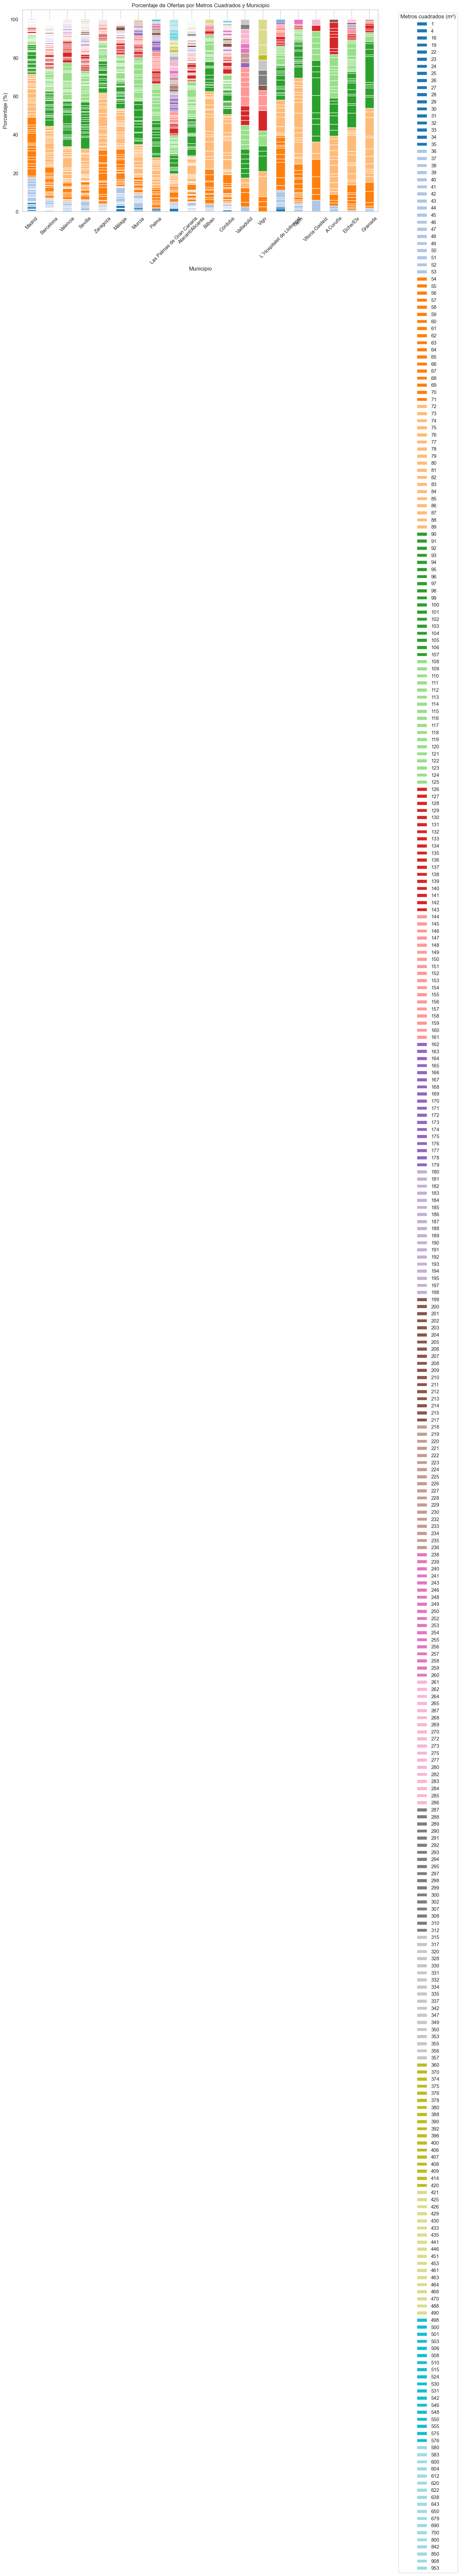

In [ ]:


# Graficar los porcentajes para cada municipio
plt.figure(figsize=(14, 8))
resultados_df.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Porcentaje de Ofertas por Metros Cuadrados y Municipio')
plt.xlabel('Municipio')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.legend(title='Metros cuadrados (m²)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()  # Ajustar el layout para que no se corten elementos
plt.show()

##### Por numero de habitaciones

In [334]:
resultados_por_hab = {}

for mun in municipios_top_20: 
    conteo_metros = df_finales[df_finales['Municipio'] == mun]['Numero habitaciones'].value_counts()
    
    porcentajes = conteo_metros / conteo_metros.sum() * 100
    
    resultados_por_hab[mun] = porcentajes
    
resultados_hab_df = pd.DataFrame(resultados_por_hab).fillna(0)
resultados_hab_df = resultados_hab_df.T

resultados_hab_df.columns.name = 'Numero habitaciones'
resultados_hab_df.index.name = 'Municipio'

In [335]:
resultados_hab_df

Numero habitaciones,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,20,21,24,40
Municipio,,,,,,,,,,,,,,,,,,,,
Madrid,16.666667,40.784314,34.313725,6.274510,1.176471,0.588235,0.196078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Barcelona,10.100091,34.485896,34.940855,14.285714,4.094631,1.455869,0.363967,0.181984,0.090992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Valencia,10.591133,22.906404,43.349754,19.704433,2.463054,0.985222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sevilla,6.415929,22.345133,43.141593,21.902655,3.982301,1.548673,0.442478,0.000000,0.000000,0.221239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zaragoza,3.977273,28.125000,50.568182,14.204545,2.556818,0.000000,0.000000,0.000000,0.000000,0.000000,0.284091,0.284091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Málaga,23.492063,34.444444,27.142857,11.111111,2.857143,0.634921,0.000000,0.158730,0.000000,0.158730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Murcia,14.285714,21.198157,41.935484,20.737327,0.000000,0.921659,0.460829,0.000000,0.000000,0.460829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Palma,11.851852,24.444444,31.111111,22.962963,8.148148,0.740741,0.000000,0.740741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Las Palmas de Gran Canaria,11.299435,16.384181,25.423729,16.384181,7.344633,2.259887,4.519774,3.389831,2.259887,2.259887,0.564972,1.129944,0.564972,2.259887,0.564972,0.564972,1.129944,0.564972,0.564972,0.564972


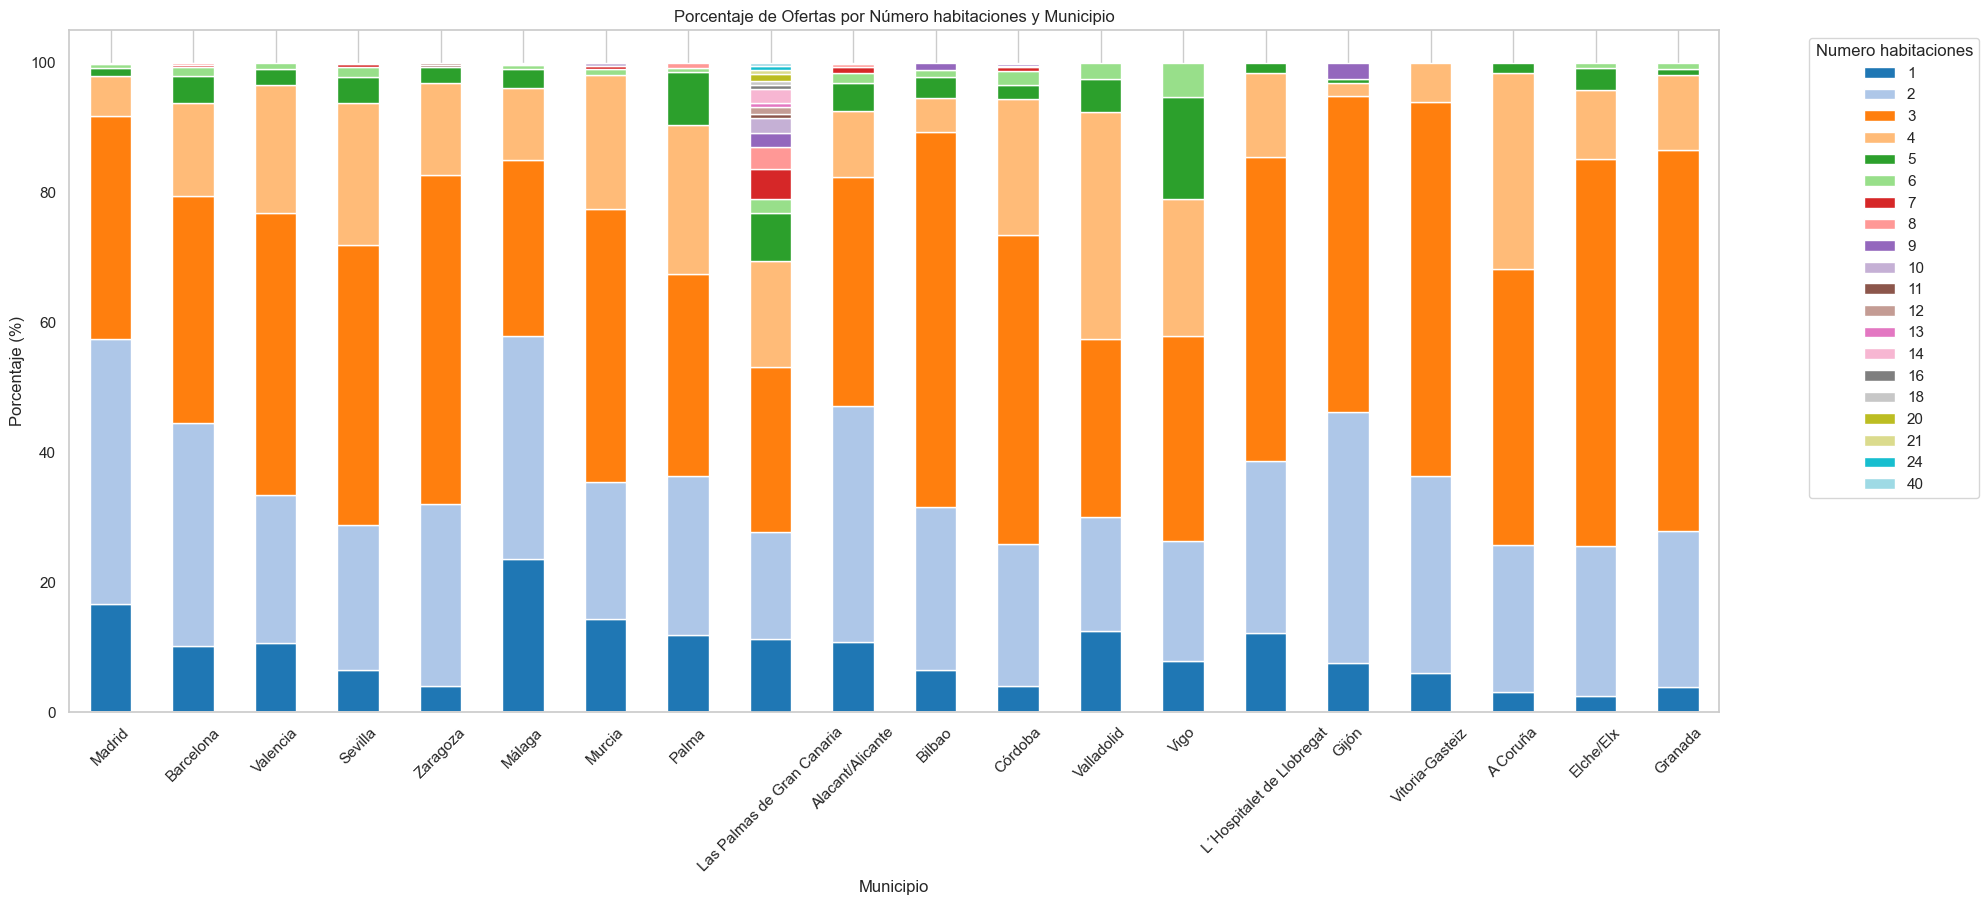

In [340]:
# Graficar los porcentajes para cada municipio
plt.figure(figsize=(20, 8))
resultados_hab_df.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Porcentaje de Ofertas por Número habitaciones y Municipio')
plt.xlabel('Municipio')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.legend(title='Numero habitaciones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()  # Ajustar el layout para que no se corten elementos
plt.subplots_adjust(bottom=0.1) 
plt.show()